In [1]:
%load_ext autoreload
%autoreload 2

import __confing
__confing.change_to_root_folder()

Current directory: C:\Users\alber\Documents\AnyoneAI\final-project


In [2]:
import pandas as pd

from src import value_filler as vs
from src import feature_selection as fs
from src import data_procces as dp

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from src import evaluation

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error

In [3]:
df=pd.read_csv(r'data\all_waves.csv')
target='rahosp1y'

In [4]:
# Drope
df = df.drop(['rahspnit1y','wave','rahhidnp'], axis=1)

df = df.dropna(subset=[target])

porcentaje_nulos = df.isnull().sum(axis=1) / len(df.columns)
df = df[(df['rahosp1y'] != 0) | (porcentaje_nulos <= 0.4)]

In [5]:
# filling
df = fs.fast_fill(df)

In [6]:
# filtering
# l1=fs.get_corr_columns(df,target,True)
# l2=fs.get_corr_columns(df,target,False)
# l3=l1+l2

# df_f = df[l3]
# df_f[target] = df[target]

In [7]:
# split
# y=df_f['rahosp1y']
# X=df_f.drop('rahosp1y',axis=1)

y=df['rahosp1y']
X=df.drop('rahosp1y',axis=1)

X_train, X_test, y_train, y_test=dp.split_data(X, y, test_size=0.2, random_state=40)

In [8]:
# resample ()
# X_train, y_train = dp.apply_resample(X_train, y_train,v=1.25)
# X_test, y_test = dp.apply_resample(X_test, y_test,v=1)

In [9]:
# smote
X_train, y_train = dp.apply_smote(X_train, y_train)

In [10]:
# scaler
X_train, X_test = dp.apply_standard_scaler(X_train, X_test)

In [11]:
# power transform
X_train, X_test = dp.apply_power_transform(X_train, X_test)

In [12]:
best_params={
    'max_depth': 3,
    'learning_rate': 0.21437737019643555,
    'n_estimators': 383,
    'min_child_weight': 1,
    'gamma': 1.7231253295851337e-07,
    'subsample': 0.9074151372299069,
    'colsample_bytree': 0.9210455551716151,
    'reg_alpha': 1.8101876780247352e-07,
    'reg_lambda': 5.689166590043403e-08
}

# Entrenar el modelo final con los mejores parámetros
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba utilizando el modelo final
y_pred = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred, squared=False)

In [13]:
# get importance
importance = best_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00021
Feature: 1, Score: 0.00024
Feature: 2, Score: 0.05628
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00026
Feature: 5, Score: 0.00015
Feature: 6, Score: 0.00011
Feature: 7, Score: 0.01210
Feature: 8, Score: 0.00195
Feature: 9, Score: 0.00051
Feature: 10, Score: 0.00110
Feature: 11, Score: 0.00100
Feature: 12, Score: 0.00018
Feature: 13, Score: 0.00011
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00027
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00024
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00027
Feature: 23, Score: 0.00019
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00016
Feature: 26, Score: 0.00027
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00055
Feature: 29, Score: 0.00049
Feature: 30, Score: 0.00038
Feature: 31, Score: 0.00288
Feature: 32, Score: 0.00024
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00016
Feature: 35, Score: 0.00135
Fe

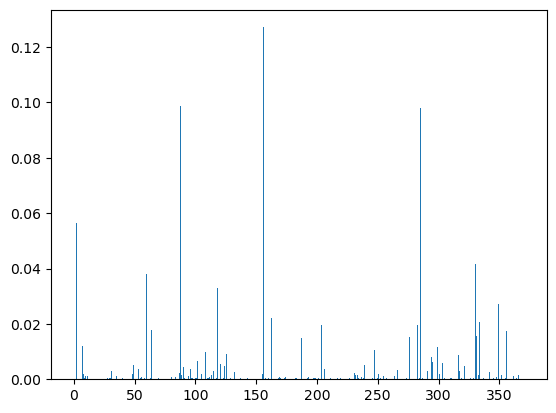

In [15]:
# plot feature importance
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
evaluation.plot_roc(y_pred,y_test)
evaluation.get_model_performance(y_pred,y_test)